实际上我们前面就用到了图像的绘制，如：io.imshow(img)

这一行代码的实质是利用 matplotlib 包对图片进行绘制，绘制成功后，返回一个 matplotlib 类型的数据。

因此，我们也可以这样写：

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

**imshow() 函数格式为：** 

matplotlib.pyplot.imshow(X, cmap=None)

- X : 要绘制的图像或数组
- cmap ： 颜色图谱（colormap), 默认绘制为RGB(A)颜色空间

其他可选的颜色图谱如下列表：

<img src="images/color.png" style="width:590px;height:460px;">

用的比较多的有：gray ，jet 等，如：

In [ ]:
plt.imshow(image,plt.cm.gray)

In [ ]:
plt.imshow(img,cmap=plt.cm.jet)

在窗口上绘制完图片后，返回一个 AxesImage 对象。

要在窗口上显示这个对象，我们可以调用 show() 函数来进行显示，但进行练习的时候（ ipython 环境中），一般我们可以省略 show() 函数，也能自动显示出来。

<class 'matplotlib.image.AxesImage'>


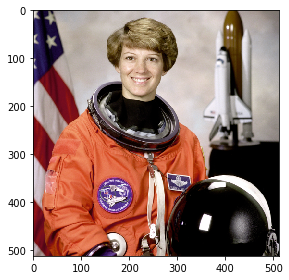

In [3]:
from skimage import io,data
img=data.astronaut()
dst=io.imshow(img)
print(type(dst))
io.show()

可以看到，类型是** 'matplotlib.image.AxesImage' **。

显示一张图片，我们通常更愿意这样写：

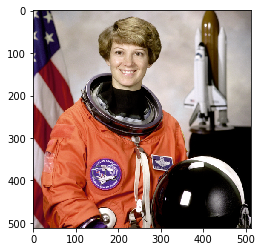

In [4]:
import matplotlib.pyplot as plt
from skimage import io,data
img=data.astronaut()
plt.imshow(img)
plt.show()

#### matplotlib 库

matplotlib 是一个专业绘图的库，相当于matlab中的plot;

可以设置多个 figure 窗口,设置 figure 的标题，隐藏坐标尺，甚至可以使用 subplot 在一个 figure 中显示多张图片。

一般我们可以这样导入 matplotlib 库：

In [ ]:
import matplotlib.pyplot as plt

也就是说，我们绘图实际上用的是 matplotlib 包的 pyplot 模块

### 一、用 figure 函数和 subplot 函数分别创建主窗口和子图

**例1：** 分开并同时显示宇航员图片的三个通道

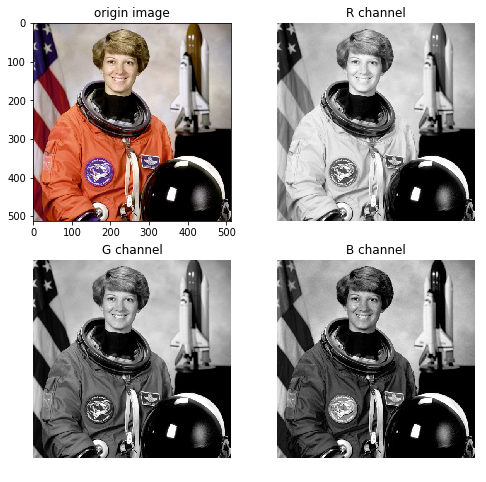

In [5]:
from skimage import data
import matplotlib.pyplot as plt
img=data.astronaut()

#创建一个名为 astronaut 的窗口,并设置大小 
plt.figure(num='astronaut',figsize=(8,8))
#将窗口分为两行两列，四个子图，则可显示四幅图片
plt.subplot(2,2,1)     
plt.title('origin image') #第一幅图片标题  
plt.imshow(img)           #绘制第一幅图片

plt.subplot(2,2,2)        #第二个子图
plt.title('R channel')    #第二幅图片标题
plt.imshow(img[:,:,0],plt.cm.gray) #绘制第二幅图片,且为灰度图
plt.axis('off')           #不显示坐标尺寸

plt.subplot(2,2,3)       #第三个子图
plt.title('G channel')   #第三幅图片标题
plt.imshow(img[:,:,1],plt.cm.gray) #绘制第三幅图片,且为灰度图
plt.axis('off')         #不显示坐标尺寸

plt.subplot(2,2,4)       #第四个子图
plt.title('B channel')   #第四幅图片标题
plt.imshow(img[:,:,2],plt.cm.gray) #绘制第四幅图片,且为灰度图
plt.axis('off')          #不显示坐标尺寸

plt.show()   #显示窗口

### 解析：

1.在图片绘制过程中，我们用 matplotlib.pyplot 模块下的 figure() 函数来创建显示窗口，该函数的格式为：

** matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None)**

所有参数都是可选的，都有默认值，因此调用该函数时可以不带任何参数，其中：

- num: 整型或字符型都可以。如果设置为整型，则该整型数字表示窗口的序号。如果设置为字符型，则该字符串表示窗口的名称。用该参数来命名窗口，如果两个窗口序号或名相同，则后一个窗口会覆盖前一个窗口。

- figsize: 设置窗口大小。是一个tuple型的整数，如figsize=（8，8）

- dpi: 整形数字，表示窗口的分辨率

- facecolor: 窗口的背景颜色

- edgecolor: 窗口的边框颜色

2.用 figure() 函数创建的窗口，只能显示一幅图片，如果想要显示多幅图片，则需要将这个窗口再划分为几个子图，在每个子图中显示不同的图片。

我们可以使用 subplot() 函数来划分子图，函数格式为：

** matplotlib.pyplot.subplot(nrows, ncols, plot_number) **

- nrows: 子图的行数

- ncols: 子图的列数

- plot_number: 当前子图的编号

如：

In [ ]:
plt.subplot(2,2,1)

则表示将 figure 窗口划分成了2行2列，共4个子图，当前为第1个子图。

我们有时也可以用这种写法：

In [ ]:
plt.subplot(221)

两种写法效果是一样的。

每个子图的标题可用 title() 函数来设置，是否使用坐标尺可用 axis() 函数来设置，如：

In [ ]:
plt.subplot(221)
plt.title("first subwindow")
plt.axis('off')  

###  二、用 subplots 来创建显示窗口与划分子图

除了上面那种方法创建显示窗口和划分子图，还有另外一种编写方法也可以，如下: 

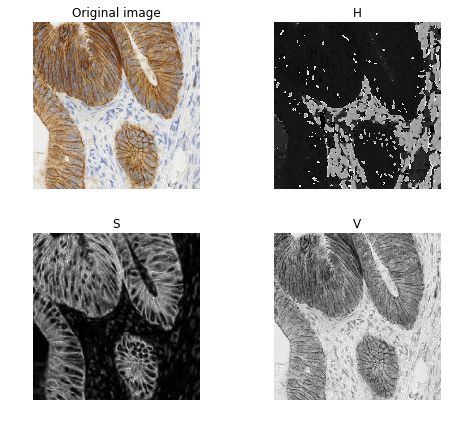

In [22]:
import matplotlib.pyplot as plt
from skimage import data,color

img = data.immunohistochemistry()
hsv = color.rgb2hsv(img)

fig, axes = plt.subplots(2, 2, figsize=(7, 6))
ax0, ax1, ax2, ax3 = axes.ravel()

ax0.imshow(img)
ax0.set_title("Original image")

ax1.imshow(hsv[:, :, 0], cmap=plt.cm.gray)
ax1.set_title("H")

ax2.imshow(hsv[:, :, 1], cmap=plt.cm.gray)
ax2.set_title("S")

ax3.imshow(hsv[:, :, 2], cmap=plt.cm.gray)
ax3.set_title("V")

for ax in axes.ravel():
    ax.axis('off')
fig.tight_layout()  #自动调整subplot间的参数
io.show()

直接用 subplots() 函数来创建并划分窗口。

注意，比前面的subplot()函数多了一个s，该函数格式为：

** matplotlib.pyplot.subplots(nrows=1, ncols=1)**

- nrows: 所有子图行数，默认为1。

- ncols: 所有子图列数，默认为1。

返回一个窗口 figure , 和一个 tuple 型的 ax 对象，该对象包含所有的子图,可结合 ravel() 函数列出所有子图，如：

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(7, 6))
ax0, ax1, ax2, ax3 = axes.ravel()

创建了2行2列4个子图，分别取名为 ax0 , ax1 , ax2 和 ax3 , 每个子图的标题用 set_title() 函数来设置，如：

In [ ]:
ax0.imshow(img)
ax0.set_title("Original image")

如果有多个子图，我们还可以使用tight_layout()函数来调整显示的布局，该函数格式为：

** matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None) **

所有的参数都是可选的，调用该函数时可省略所有的参数。

- pad: 主窗口边缘和子图边缘间的间距，默认为1.08

- h_pad, w_pad: 子图边缘之间的间距，默认为 pad_inches

- rect: 一个矩形区域，如果设置这个值，则将所有的子图调整到这个矩形区域内。

一般调用为：

In [ ]:
plt.tight_layout()   #自动调整subplot间的参数

### 三、其他方法绘图并显示

除了使用 matplotlib 库来绘制图片，skimage 还有另一个子模块 viewer ，也提供一个函数来显示图片。

不同的是，它利用 Qt 工具来创建一块画布，从而在画布上绘制图像。

例：

In [25]:
from skimage import data
from skimage.viewer import ImageViewer
img=data.coins()
viewer=ImageViewer(img)
viewer.show()

/home/zhaozhao/anaconda3/lib/python3.6/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


[]

<img src="images/coin.png" style="width:400px;height:350px;">

### 四、总结：绘制和显示图片常用到的函数

<img src="images/huituhanshu.png" style="width:550px;height:350px;">